# Análisis del texto

In [48]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [49]:
# Force datatime on the `tweet_created` column
df.tweet_created = pd.to_datetime(df.tweet_created)

# How many tweets do we have?
print("Number of tweets:", df.shape[0])

# Show first rows on dataframe
df.head(4)

Number of tweets: 7867


,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)


In [50]:
print(df['reply_count'].unique(),df['retweet_count'].unique())
df.drop(['retweet_count','reply_count'], axis=1).head(4)

[0] [0]


,airline_sentiment,is_reply,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,
942743012337123328,positive,False,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)


In [51]:
df['airline_sentiment'].unique()
counts = df.groupby('airline_sentiment').size()
print(counts) 

airline_sentiment
negative    3788
neutral     2555
positive    1524
dtype: int64


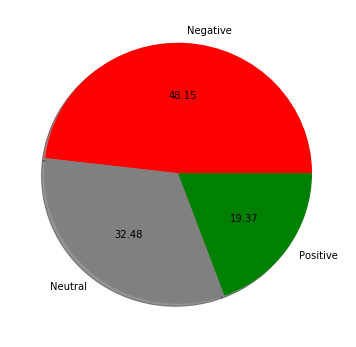

In [52]:
plt.pie(counts,colors=['r','gray','g'],labels=['Negative','Neutral','Positive'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)
#fig.savefig('figure.pdf', bbox_inches='tight')

*Data cleaning:*
- Convert all characters to lowercase
- Delete URLs and additional white spaces
- Transform emojis into "words": EMOPOS (positive emoji) or EMONEG (negative emoji)

In [53]:
import re
def cleaning(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    
    # Handle_emojis; EMOPOS=positive and EMONEG=negative
    tweet = re.sub(r'CC:', ' EMOPOS ', tweet)
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMOPOS ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMOPOS ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' EMOPOS ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMOPOS ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMONEG ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' EMONEG ', tweet)
    # Horror, Disgust -- D‑':, D:< ,D:, D8 , D; , D= , DX
    #print(tweet)
    return tweet

df['text'] = df['text'].apply(cleaning)
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""los pilotos de ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,0,0,@iberia me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,0,0,"@supermanlopezn @iberia @giroditalia champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)
938207464457211904,negative,True,0,0,@srtafarrelldm @klm @iberia eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada)


Extract the users and the hashtags that appear in each tweet and store them in two new columns

In [101]:
def extract_users(tweet):
    users = re.findall(r'@\S\w*',tweet)
    usersnoarrova = [user[1:] for user in users]
    usersnoarrova = '|'.join(usersnoarrova)
    if len(users)==0 : usersnoarrova = np.nan
    return usersnoarrova
df['users'] = df['text'].apply(extract_users)

def extract_hashtags(tweet):
    hashtags = re.findall(r'#\S[^0-9]\w*',tweet)
    nohash = [hashtag[1:] for hashtag in hashtags]
    nohash = '|'.join(nohash)
    if len(hashtags)==0 : nohash = np.nan
    return nohash
df['hashtags'] = df['text'].apply(extract_hashtags)

df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,users,hashtags
tweet_id,,,,,,,,,,,
942743012337123328,positive,False,0,0,"""los pilotos de ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin,NaN,NaN
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,iberia|lavecinarubia,rubijarena
936979305720090626,neutral,True,0,0,@iberia me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN,iberia,NaN
943983853802328064,negative,True,0,0,"@supermanlopezn @iberia @giroditalia champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),supermanlopezn|iberia|giroditalia,NaN
938207464457211904,negative,True,0,0,@srtafarrelldm @klm @iberia eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada),srtafarrelldm|klm|iberia,NaN


In [102]:
# Drop data gaps in column 'hastags'
df2 = df.dropna(subset=['hashtags'])
df2.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,users,hashtags
tweet_id,,,,,,,,,,,
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,iberia|lavecinarubia,rubijarena
932856751099142144,positive,False,0,0,"con @iberia, mi destino a un solo click. ¡dese...",NaN,2017-11-21 06:22:35,NaN,NaN,iberia,holacolombia
937549230994051073,positive,False,0,0,"con @iberia, mi destino a un solo click. ¡dese...",NaN,2017-12-04 05:08:50,NaN,Central Time (US & Canada),iberia,holacolombia
931611760829792256,neutral,False,0,0,"con @iberia, mi destino a un solo click. ¡dese...",NaN,2017-11-17 19:55:26,NaN,NaN,iberia,holaargentina
943844779976208384,neutral,False,0,0,oferta de #empleo #tcp: @iberia busca auxiliar...,NaN,2017-12-21 14:05:05,NaN,NaN,iberia,empleo|tcp|diciembre|madrid|barcelona


In [118]:
# Dataframe sentiment vs. hashtag
sentiment_hashtag = df2.set_index('airline_sentiment').hashtags.str.split(r'|', expand=True).stack().reset_index(level='airline_sentiment')
sentiment_hashtag.columns = ['airline_sentiment','hashtag']
# Dataframe hashtag vs. sentiment, where multiple hashtags have 
# replicated sentiments 
df3 = sentiment_hashtag.set_index('hashtag')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['airline_sentiment'])
histogram = counted.groupby('hashtag').sum()
histogram.head(4)

,negative,neutral,positive
hashtag,,,
3cat10,0,1,0
3ene,0,1,0
acojonante,1,0,0
acoruña,0,2,0


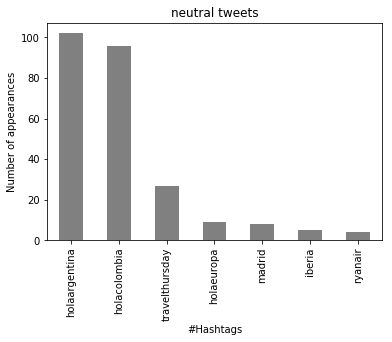

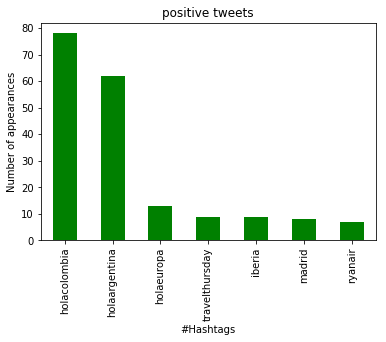

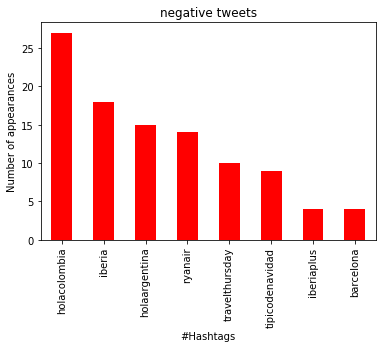

In [119]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 3].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':'g','negative':'r','neutral':'gray'}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('#Hashtags')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    return

keys = ['neutral','positive','negative']
for key in keys:
    plot_histo(key)

In [122]:
# Drop data gaps in column 'users'
df2 = df.dropna(subset=['users'])
# Dataframe sentiment vs. users
sentiment_users = df2.set_index('airline_sentiment').users.str.split(r'|', expand=True).stack().reset_index(level='airline_sentiment')
sentiment_users.columns = ['airline_sentiment','users']
# Dataframe users vs. sentiment, where multiple users have 
# replicated sentiments 
df3 = sentiment_users.set_index('users')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['airline_sentiment'])
histogram = counted.groupby('users').sum()
histogram.head(4)

,negative,neutral,positive
users,,,
/ryanair,1.0,0.0,0.0
007doctorno,0.0,0.0,1.0
1961_pilar,0.0,0.0,1.0
1976agus,0.0,0.0,1.0


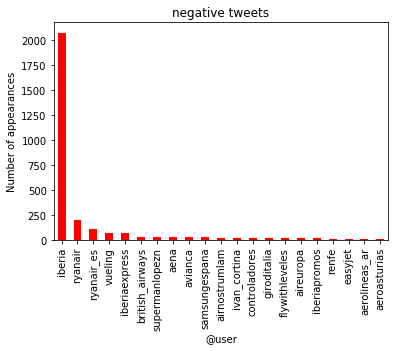

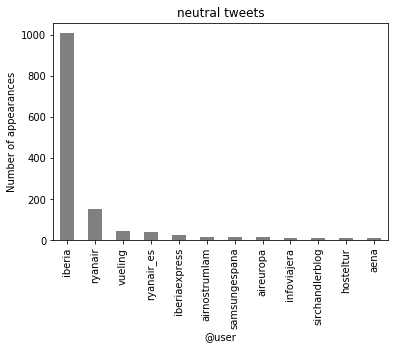

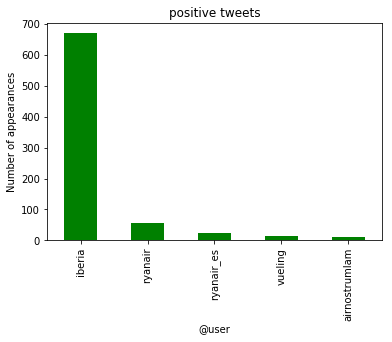

In [123]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 10].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':'g','negative':'r','neutral':'gray'}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('@user')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    return

keys = ['negative','neutral','positive']
for key in keys:
    plot_histo(key)

In [206]:
def more_cleaning(tweet):
    #Convert @username to username TO AVOID DELETING AIRLINES
    tweet = re.sub('@','',tweet)
    #Replace #word with word
    tweet = re.sub('#', '', tweet)
    return tweet

df['text'] = df['text'].apply(more_cleaning)
df['text'].head(10)

tweet_id
942743012337123328    "los pilotos de ryanair desconvocan la huelga ...
926857871916183553    iberia lavecinarubia si ,por favor las declara...
936979305720090626          iberia me dirías por favor que costo tiene?
943983853802328064    supermanlopezn iberia giroditalia champion, no...
938207464457211904    srtafarrelldm klm iberia eso de avianca es ver...
931526746301714435    iberia hola, no conozco mi numéro iberia plus,...
933385784228532233    el canal smithsonian reconstruye en video el a...
932856751099142144    con iberia, mi destino a un solo click. ¡desea...
927623530585509889    facua pueden ayudarme con una maleta perdida p...
930719355704430592    rt muchachino: en el sistema de entretenimient...
Name: text, dtype: object

In [207]:
def joinstrings(frame):
    onestring = ' '.join(frame['text'].str.lower())
    return onestring
all_text = df.groupby('airline_sentiment').apply(joinstrings)
#all_text['positive']

We read a list of airlines from https://openflights.org/data.html and neglect those that are listed as non-active nowadays.

In [209]:
airlines = pd.read_csv('airlines/airlines.dat', encoding='latin-1',index_col='Airline ID',sep=',')
airlines.columns.tolist()
airlines.tail()

,Name,Alias,IATA,ICAO,Callsign,Country,Active
Airline ID,,,,,,,
21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
21270,Air Carnival,NaN,2S,\N,NaN,India,Y
21317,Svyaz Rossiya,Russian Commuter,7R,SJM,RussianConnecty,Russia,Y


In [210]:
# Drop non-active airlines
active_airlines = airlines.drop(airlines.index[(airlines.Active == 'N')])
# Drop airlines with missing data
active_airlines = active_airlines.dropna()
# Save list of active complete airlines
airlines_list = active_airlines['Name'].str.lower()

In [211]:
airlines_list = airlines_list.tolist()
print(airlines_list[20:30])

['astraeus', 'aerosvit airlines', 'air italy', 'alliance airlines', 'ariana afghan airlines', 'aeroflot russian airlines', 'air bosna', 'air france', 'air caledonie international', 'air cargo carriers']


In [214]:
import re

occ = dict()
for airline in airlines_list:
    occ[airline] = len(re.findall(airline,all_text['negative']))
    

In [215]:
for w in sorted(occ, key=occ.get, reverse=True):
  print (w, occ[w])


iberia 2936
ryanair 1027
spanair 99
tame 24
easyjet 16
air madrid 7
british airways 7
lufthansa 7
norwegian 7
american airlines 5
air france 4
qatar 4
air europa 3
alitalia 3
klm 3
niki 3
air nostrum 2
emirates 2
volaris 2
aeroper 1
air canada 1
aerolineas argentinas 1
aer lingus 1
eva air 1
swissair 1
tap portugal 1
united airlines 1
1time airline 0
40-mile air 0
ansett australia 0
aigle azur 0
aloha airlines 0
asiana airlines 0
askari aviation 0
afriqiyah airways 0
allegiant air 0
aban air 0
absa - aerolinhas brasileiras 0
astral aviation 0
ada air 0
adria airways 0
aero benin 0
aegean airlines 0
air europe 0
alaska central express 0
astraeus 0
aerosvit airlines 0
air italy 0
alliance airlines 0
ariana afghan airlines 0
aeroflot russian airlines 0
air bosna 0
air caledonie international 0
air cargo carriers 0
air namibia 0
aerolitoral 0
air glaciers 0
atlas blue 0
azerbaijan airlines 0
avies 0
airblue 0
air berlin 0
air india limited 0
air bourbon 0
air atlanta icelandic 0
air tahiti